<a href="https://colab.research.google.com/github/vifirsanova/compling/blob/main/tasks/task2_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Критерии оценивания:

1. произведена сегментация на уровне предложений (1 балл)
2. произведена сегментация на уровне N-грамм (1 балл)
3. произведена сегментация на уровне слов (1 балл)
4. датасет опубликован на HF Datasets (1 балл)
5. оформлена карточка на HF Datasets (1 балл)
6. в карточке представлена информация о проведенном анализе (3 балла)
7. в карточке представлен частотный анализ слов в виде графика (1 балл)
8. в карточке представлен частотный анализ слов в виде облака (1 балл)

**В комментариях к блокноту нужно обязательно добавить ссылку на ваш датасет**

# Задача 2: Разметка датасета с HF Datasets: статистический анализ и визуализация


    датасет опубликован на HF Datasets (1 балл)
    оформлена карточка на HF Datasets (1 балл)
    в карточке представлена информация о распределении длин предложений (1 балл)
    в карточке представлена информация о распределении длин N-грамм (1 балл)
    в карточке представлена информация о распределении длин слов (1 балл)
    в карточке представлен частотный анализ слов в виде графика (1 балл)
    в карточке представлен частотный анализ слов в виде облака (1 балл)


**Шаг 1**: Установка необходимых библиотек и загрузка текста

In [1]:
# Устанавливаем необходимые библиотеки
!pip install datasets nltk spacy -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-c

In [2]:
# Импорт наших инструментов
import re
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datasets
import nltk, spacy

In [3]:
# Загружаем Spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
# Подключаем ресурсы NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

**Задание**: загрузите текст для разметки

**Опции**:
1. использовать свой текст
2. использовать текст из задания 1: `https://github.com/vifirsanova/compling/blob/main/tasks/task1/data.txt`

In [5]:
!wget -O text.txt https://raw.githubusercontent.com/vifirsanova/compling/refs/heads/main/tasks/task1/data.txt

--2025-03-23 12:49:51--  https://raw.githubusercontent.com/vifirsanova/compling/refs/heads/main/tasks/task1/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444304 (434K) [text/plain]
Saving to: ‘text.txt’

text.txt            100%[===================>] 433.89K  --.-KB/s    in 0.05s   

2025-03-23 12:49:51 (9.04 MB/s) - ‘text.txt’ saved [444304/444304]



In [6]:
with open("text.txt", "r", encoding="utf-8") as file:
    text = file.read()

print(text[:200])

Title: 5 Common SQL Mistakes and How to Avoid Them

Ever wondered how to effectively use 5 common sql mistakes and how to avoid them.

This topic is crucial for developers because it helps in creating


**Шаг 2**: сегментация

Вы можете использовать любые библиотеки

In [ ]:
# выполните здесь код для сегментации на уровне предложений
# выполните здесь код для сегментации на уровне слов
# выполните здесь код для сегментации на биграмм

In [15]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from nltk import bigrams

# Код для сегментации на уровне предложений
sentences = sent_tokenize(text)

# Код для сегментации на уровне слов
words = []
for sentence in sentences:
    sentence_words = []
    for word in word_tokenize(sentence):
        if word not in string.punctuation:
            sentence_words.append(word)
    words.append(sentence_words)

# Код для сегментации на биграмм
bigrams = []
for i in words:
    sentence_bigrams = list(ngrams(i, 2))
    bigrams.append(sentence_bigrams)

print(f"НА УРОВНЕ ПРЕДЛОЖЕНИЙ:\n{sentences[101]}\nНА УРОВНЕ СЛОВ:\n{words[101]}\nНА УРОВНЕ БИГРАМ:\n{bigrams[101]}")

НА УРОВНЕ ПРЕДЛОЖЕНИЙ:
Through this blog, we aim to provide a clear explanation of the concepts, complete with code snippets and real-world applications.
НА УРОВНЕ СЛОВ:
['Through', 'this', 'blog', 'we', 'aim', 'to', 'provide', 'a', 'clear', 'explanation', 'of', 'the', 'concepts', 'complete', 'with', 'code', 'snippets', 'and', 'real-world', 'applications']
НА УРОВНЕ БИГРАМ:
[('Through', 'this'), ('this', 'blog'), ('blog', 'we'), ('we', 'aim'), ('aim', 'to'), ('to', 'provide'), ('provide', 'a'), ('a', 'clear'), ('clear', 'explanation'), ('explanation', 'of'), ('of', 'the'), ('the', 'concepts'), ('concepts', 'complete'), ('complete', 'with'), ('with', 'code'), ('code', 'snippets'), ('snippets', 'and'), ('and', 'real-world'), ('real-world', 'applications')]


In [ ]:
"""

ОБРАЗЕЦ ОЖИДАЕМОГО РЕЗУЛЬТАТА ВЫДАЧИ:

- ПРОВЕРЬТЕ ВАШ РЕЗУЛЬТАТ,
- СРАВНИТЕ ЕГО С ОБРАЗЦОМ ПЕРЕД СДАЧЕЙ РАБОТЫ

"""

НА УРОВНЕ ПРЕДЛОЖЕНИЙ:
['Your sample text goes here', 'Replace this string with your dataset or a larger text corpus']

НА УРОВНЕ СЛОВ:
['your', 'sample', 'text', 'goes', 'here', 'replace', 'this', 'string', 'with', 'your', 'dataset', 'or', 'a', 'larger', 'text', 'corpus']

НА УРОВНЕ БИГРАММ:
[('your', 'sample'), ('sample', 'text'), ('text', 'goes'), ('goes', 'here'), ('here', 'replace'), ('replace', 'this'), ('this', 'string'), ('string', 'with'), ('with', 'your'), ('your', 'dataset'), ('dataset', 'or'), ('or', 'a'), ('a', 'larger'), ('larger', 'text'), ('text', 'corpus')]


Далее вы должны самостоятельно принять решение о том, как должен выглядеть ваш датафрейм

В датафрейме вы должны представить 3 типа сегментации текста

Используйте pandas, чтобы оформить свой датасет

In [ ]:
#ваш код здесь

In [16]:
import pandas as pd

data = {"sentences": sentences, "words": words, "bigrams": bigrams}

df = pd.DataFrame(data)
df.head()

,sentences,words,bigrams
0,Title: 5 Common SQL Mistakes and How to Avoid ...,"[Title, 5, Common, SQL, Mistakes, and, How, to...","[(Title, 5), (5, Common), (Common, SQL), (SQL,..."
1,This topic is crucial for developers because i...,"[This, topic, is, crucial, for, developers, be...","[(This, topic), (topic, is), (is, crucial), (c..."
2,We'll cover the basics and also discuss some a...,"[We, 'll, cover, the, basics, and, also, discu...","[(We, 'll), ('ll, cover), (cover, the), (the, ..."
3,"By the end of this article, you'll have a clea...","[By, the, end, of, this, article, you, 'll, ha...","[(By, the), (the, end), (end, of), (of, this),..."
4,"To deepen your understanding, explore the addi...","[To, deepen, your, understanding, explore, the...","[(To, deepen), (deepen, your), (your, understa..."


**Шаг 3**:

1. произведите любые 3 типа статистического анализа, используйте образцы ниже
2. опишите, какую информацию вы можете получить на основе проведенного анализа
3. далее: оформите результаты вашего анализа в карточке датасета

**1. Анализ уникальности данных**

- **Доля уникальных слов:** Рассчитать процент уникальных слов в корпусе.
- **Коэффициент лексического разнообразия (Type-Token Ratio, TTR):** Отношение числа уникальных слов к общему количеству слов.

```python
unique_words = set(words)
lexical_diversity = len(unique_words) / len(words)
```

**2. Анализ биграмм и триграмм**
- Построить частотное распределение биграмм и триграмм.
- Выделить наиболее часто встречающиеся сочетания.

```python
trigrams = list(ngrams(words, 3))
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)
```

**3. Анализ распределений**

- Построить гистограммы для:
  - Длин предложений.
  - Длин слов.
  - Длин n-грамм.
- Вычислить медиану, стандартное отклонение, и квартили для распределений.

```python
import numpy as np

mean_sentence_length = np.mean(sentence_lengths)
std_sentence_length = np.std(sentence_lengths)
median_sentence_length = np.median(sentence_lengths)
quartiles_sentence_length = np.percentile(sentence_lengths, [25, 50, 75])
```

**4. Анализ частоты POS-тегов**

Использовать библиотеку `spacy` для разметки текста на части речи (POS tagging) и выделения наиболее часто встречающихся POS-тегов.

```python
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(data)
pos_counts = Counter([token.pos_ for token in doc])
```

**5. Анализ семантического поля**

- Использовать WordNet из `nltk` для анализа семантической близости между словами.
- Построить семантическую сеть, выделив связанные слова и частотные значения.

```python
from nltk.corpus import wordnet

synonyms = []
for word in unique_words:
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
```

**6. Анализ совместной встречаемости**
- Создать матрицу ко-частотности слов для анализа совместного появления терминов.

```python
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(sentences)
co_occurrence_matrix = (X.T * X).toarray()
```

**7. TF-IDF**

Рассчитать значения TF-IDF для слов, чтобы определить важные термины в тексте.

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
feature_names = tfidf_vectorizer.get_feature_names_out()
```

In [ ]:
# ваш код здесь

1. Анализ уникальности данных

In [18]:
words_all = []
for word in word_tokenize(text):
    if word not in string.punctuation:
        words_all.append(word)
unique_words = set(words_all)
lexical_diversity = len(unique_words) / len(words_all)

print(f"Коэффициент лексического разнообразия: {lexical_diversity}")

Коэффициент лексического разнообразия: 0.0035502150611046632


2. Анализ биграмм и триграмм


In [44]:
from collections import Counter

bigrams_2 = list(ngrams(words_all, 2))
trigrams = list(ngrams(words_all, 3))
bigram_counts = Counter(bigrams_2)
trigram_counts = Counter(trigrams)

print(f'Биграммы: {bigram_counts}\nТриграммы: {trigram_counts}')

Биграммы: Counter({('If', 'you'): 687, ('in', 'your'): 615, ('how', 'to'): 502, ('we', "'ll"): 490, ('We', "'ll"): 416, ('your', 'projects'): 412, ('this', 'article'): 409, ('at', 'first'): 409, ('the', 'additional'): 406, ('additional', 'resources'): 406, ('resources', 'we'): 406, ('we', "'ve"): 406, ('Do', "n't"): 406, ('the', 'end'): 400, ('end', 'of'): 400, ('a', 'clear'): 397, ('In', 'this'): 387, ('of', 'the'): 385, ('the', 'basics'): 303, ('to', 'avoid'): 301, ('a', 'practical'): 300, ('practical', 'example'): 300, ('this', 'post'): 297, ('post', 'we'): 297, ('this', 'guide'): 293, ('of', 'how'): 237, ('To', 'deepen'): 212, ('deepen', 'your'): 212, ('your', 'understanding'): 212, ('understanding', 'explore'): 212, ('explore', 'the'): 212, ("'ve", 'shared'): 212, ('shared', 'Do'): 212, ("n't", 'hesitate'): 212, ('hesitate', 'to'): 212, ('to', 'experiment'): 212, ('experiment', 'and'): 212, ('and', 'learn'): 212, ('learn', 'Title'): 212, ('While', 'it'): 210, ('it', 'might'): 210,

In [45]:
print(f'Наиболее часто встречающиеся сочетания:\nБиграммы: {Counter(bigrams_2).most_common(3)}\nТриграммы: {Counter(trigrams).most_common(3)}')

Наиболее часто встречающиеся сочетания:
Биграммы: [(('If', 'you'), 687), (('in', 'your'), 615), (('how', 'to'), 502)]
Триграммы: [(('in', 'your', 'projects'), 412), (('the', 'additional', 'resources'), 406), (('additional', 'resources', 'we'), 406)]


3. Анализ распределений

Построить гистограммы для:
Длин предложений.
Длин слов.
Длин n-грамм.
Вычислить медиану, стандартное отклонение, и квартили для распределений.

In [48]:
import numpy as np

def distribution_analysis(data):
    mean_sentence_length = np.mean(data)
    std_sentence_length = np.std(data)
    median_sentence_length = np.median(data)
    quartiles_sentence_length = np.percentile(data, [25, 50, 75])

    print(f'Среднее значение: {mean_sentence_length}')
    print(f'Стандартное отклонение: {std_sentence_length}')
    print(f'Медиана: {median_sentence_length}')
    print(f'Квартили: {quartiles_sentence_length}')

Предложения

In [49]:
sentence_lengths = []
for sentence in sentences:
    sentence_lengths.append(len(sentence))
distribution_analysis(sentence_lengths)

Среднее значение: 83.76853630426432
Стандартное отклонение: 36.28491558711112
Медиана: 83.0
Квартили: [ 64.  83. 108.]


Text(0.5, 1.0, 'Распределение длин предложений')

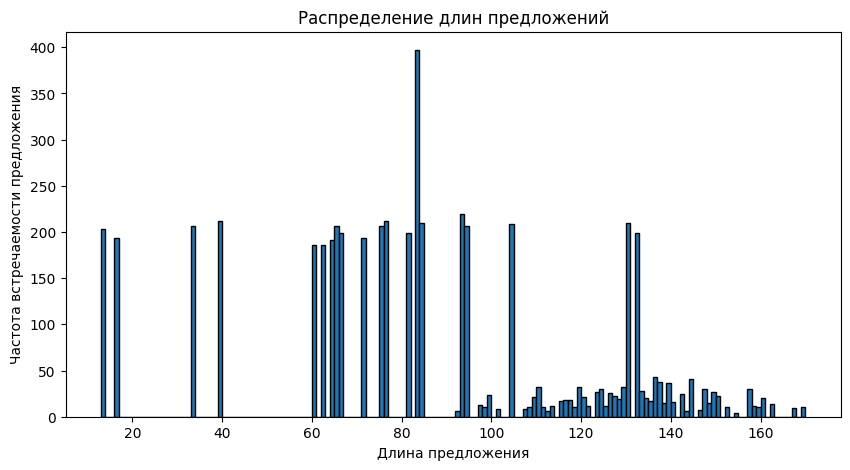

In [50]:
plt.figure(figsize=(10, 5))
plt.hist(sentence_lengths, bins=range(min(sentence_lengths), max(sentence_lengths) + 1), edgecolor='black')
plt.xlabel(f'Длина предложения')
plt.ylabel(f'Частота встречаемости предложения')
plt.title(f'Распределение длин предложений')

Слова

In [51]:
words_lengths = []
for word in words_all:
    words_lengths.append(len(word))
distribution_analysis(words_lengths)

Среднее значение: 4.929391684303953
Стандартное отклонение: 2.761337805063748
Медиана: 4.0
Квартили: [3. 4. 7.]


Text(0.5, 1.0, 'Распределение длин слов')

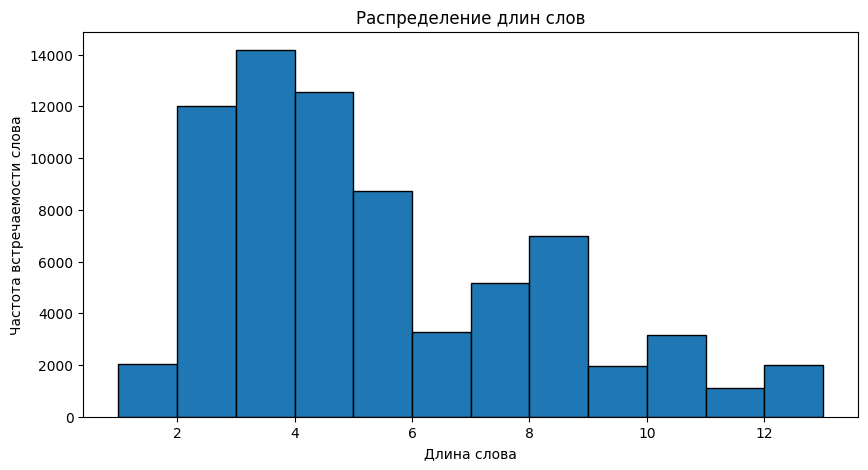

In [52]:
plt.figure(figsize=(10, 5))
plt.hist(words_lengths, bins=range(min(words_lengths), max(words_lengths) + 1), edgecolor='black')
plt.xlabel(f'Длина слова')
plt.ylabel(f'Частота встречаемости слова')
plt.title(f'Распределение длин слов')

Биграммы

In [53]:
bigrams_lengths = []
for bigram in bigrams_2:
    bigrams_lengths.append(len(bigram[0])+len(bigram[1]))
distribution_analysis(bigrams_lengths)

Среднее значение: 9.858795095174372
Стандартное отклонение: 3.871814057788102
Медиана: 9.0
Квартили: [ 7.  9. 12.]


Text(0.5, 1.0, 'Распределение длин биграмм')

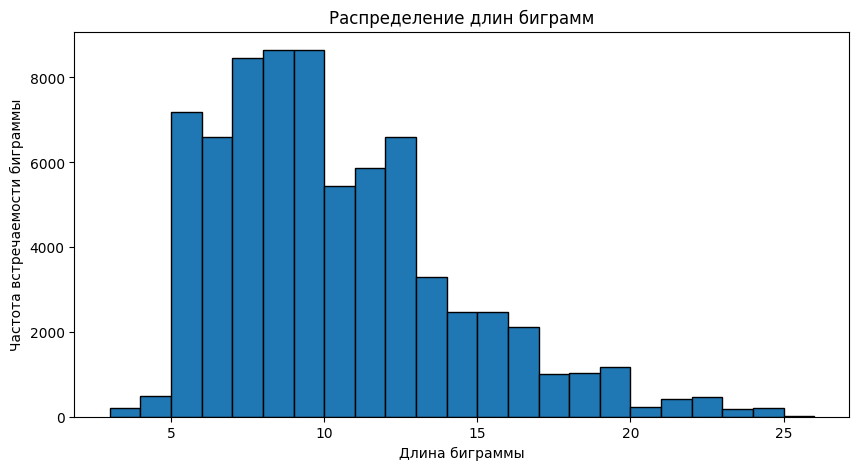

In [54]:
plt.figure(figsize=(10, 5))
plt.hist(bigrams_lengths, bins=range(min(bigrams_lengths), max(bigrams_lengths) + 1), edgecolor='black')
plt.xlabel(f'Длина биграммы')
plt.ylabel(f'Частота встречаемости биграммы')
plt.title(f'Распределение длин биграмм')

**Шаг 4**: визуализируйте данные по образцу

In [59]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

clean_text = []
stopwords = set(stopwords.words('english'))
for word in word_tokenize(text):
    if word.lower() not in stopwords:
        clean_text.append(re.sub('[^\w\s]', '', word))

print(clean_text[:200])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Title', '', '5', 'Common', 'SQL', 'Mistakes', 'Avoid', 'Ever', 'wondered', 'effectively', 'use', '5', 'common', 'sql', 'mistakes', 'avoid', '', 'topic', 'crucial', 'developers', 'helps', 'creating', 'efficient', 'reusable', 'code', '', 'll', 'cover', 'basics', 'also', 'discuss', 'advanced', 'techniques', '', 'end', 'article', '', 'll', 'clear', 'understanding', 'implement', 'projects', '', 'deepen', 'understanding', '', 'explore', 'additional', 'resources', 've', 'shared', '', 'nt', 'hesitate', 'experiment', 'learn', '', 'Title', '', 'Understanding', 'Python', 'Generators', 're', 'new', 'coding', '', 'guide', 'help', 'understand', 'understanding', 'python', 'generators', '', 'blog', '', 'aim', 'provide', 'clear', 'explanation', 'concepts', '', 'complete', 'code', 'snippets', 'realworld', 'applications', '', 've', 'avoiding', 'topic', '', 's', 'time', 'tackle', '', 'hope', 'guide', 'provided', 'solid', 'foundation', '', 'questions', '', 'feel', 'free', 'leave', 'comment', '', 'Title',

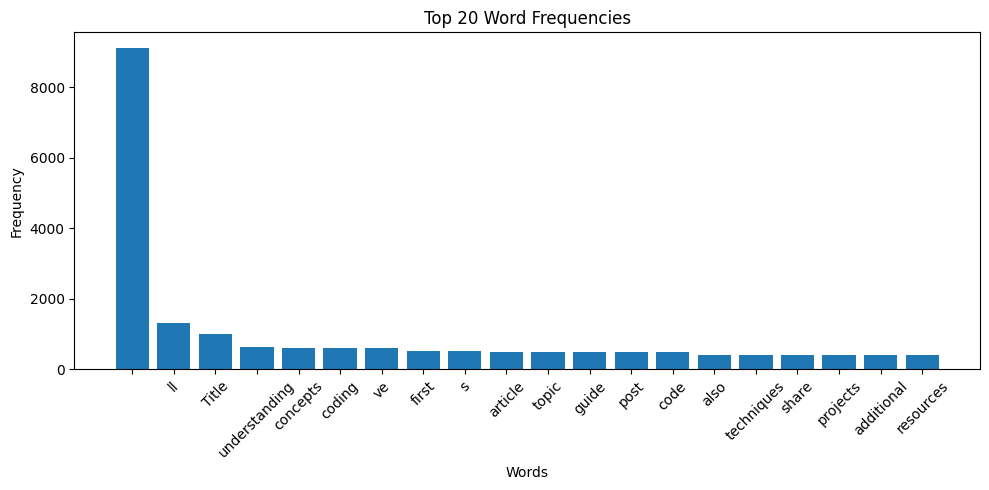

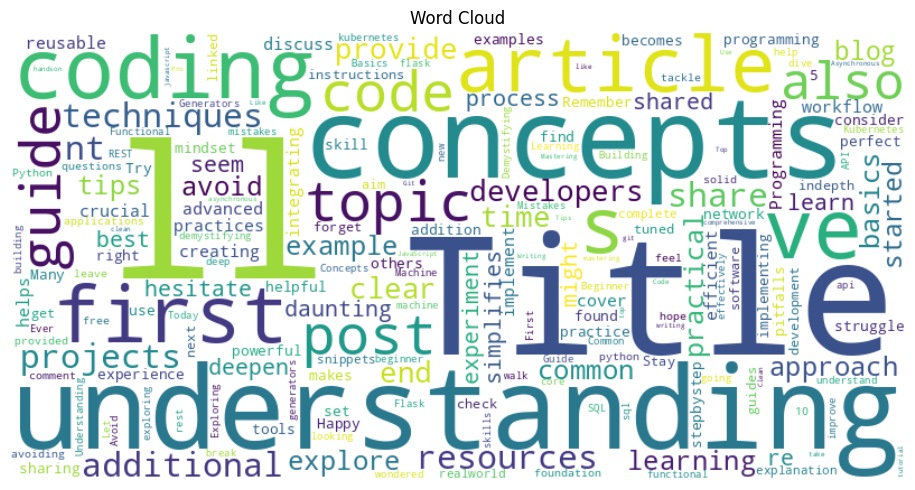

In [60]:
word_counts = Counter(clean_text)

# Word Frequency Plot
plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_counts.most_common(20)))
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("word_frequency_plot.png")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.tight_layout()
plt.savefig("word_cloud.png")
plt.show()

**Шаг 5**: отправляем на HF Datasets сегментированные данные и оформляем карточку

Что должно быть представлено в карточке:

- результат статистического анализа 3-х типов
- выводы по проведенному анализу
  - какой анализ был проведен?
  - в чем заключается основная идея этого анализа и зачем он нужен?
  - какие тренды удалось выявить?
- гистограмма
- облако слов

In [61]:
# Создаем датасет
from datasets import Dataset
dataset = Dataset.from_pandas(df)
# Публикация датасета
dataset.push_to_hub("", token='')
# просмотр результатов
dataset

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset({
    features: ['sentences', 'words', 'bigrams'],
    num_rows: 5206
})

Ссылка на датасет: https://huggingface.co/datasets/salomadoma/task_2